In [1]:
#@title MIT License
#
# Copyright (c) 2020 Balázs Pintér 
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from collections import Counter
import nltk
from itertools import islice
import scipy.sparse as sps

# Getting a corpus

In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))

# What's in the corpus?

In [4]:
dataset.data[100:103]

['\nI\'ve been a very intent NREN spectator of the NREN for years.  As a \ncommercial IP software vendor, it really is my professional opinion that the \nNREN, at this point, is irrelevant to private sector networking.  If it had \nbeen deployed five years ago, it would have been a major development.  Now,\nhowever, it\'s just an upgrade to the NSFnet, and an attempt to revive the \nlagging use of the national supercomputer centers.  You could cut out the \nNSFnet completely, and the Internet would continue chugging along without a \nhiccup (aside from a few universities).\n\nLong-haul networking and Internet connectivity have long since ceased to be \nunder federal sponsorship or regulation, at least in the USA.  The success of \nthe CIX (Commercial Internet Exchange) is a prime example of this.  While our \ndear VP has been promoting his "data superhighway," the private sector has \nbeen building it, without the NSFnet\'s restrictions.\n\nTo illustrate, a connection from the machine 

In [5]:
print(dataset.data[100])


I've been a very intent NREN spectator of the NREN for years.  As a 
commercial IP software vendor, it really is my professional opinion that the 
NREN, at this point, is irrelevant to private sector networking.  If it had 
been deployed five years ago, it would have been a major development.  Now,
however, it's just an upgrade to the NSFnet, and an attempt to revive the 
lagging use of the national supercomputer centers.  You could cut out the 
NSFnet completely, and the Internet would continue chugging along without a 
hiccup (aside from a few universities).

Long-haul networking and Internet connectivity have long since ceased to be 
under federal sponsorship or regulation, at least in the USA.  The success of 
the CIX (Commercial Internet Exchange) is a prime example of this.  While our 
dear VP has been promoting his "data superhighway," the private sector has 
been building it, without the NSFnet's restrictions.

To illustrate, a connection from the machine on my desk to the mac

In [6]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
dataset.target[100:110]

array([11, 12,  2,  5,  3, 14,  7,  8,  3,  7])

In [8]:
[dataset.target_names[target] for target in dataset.target[100:110]]

['sci.crypt',
 'sci.electronics',
 'comp.os.ms-windows.misc',
 'comp.windows.x',
 'comp.sys.ibm.pc.hardware',
 'sci.space',
 'rec.autos',
 'rec.motorcycles',
 'comp.sys.ibm.pc.hardware',
 'rec.autos']

# Plotting document length frequencies

## Lengths in characters

In [9]:
len_chars = np.array([len(doc) for doc in dataset.data])
len_chars[:10]

array([ 852,  546,  698,  987,  341,  262, 3271,  887,  525,  855])

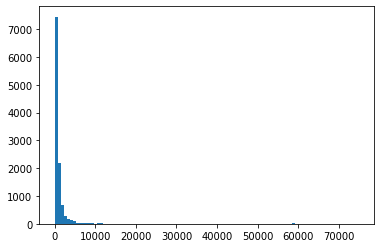

In [10]:
plt.hist(len_chars, 100);

In [11]:
np.sort(len_chars)[-100:]

array([14734, 15023, 15161, 15174, 15515, 15703, 16021, 16025, 16348,
       16919, 17747, 18089, 18135, 18376, 18656, 19041, 19381, 19558,
       19718, 19853, 19982, 20249, 21225, 21314, 21810, 22317, 22363,
       24232, 24659, 24722, 24782, 25156, 25281, 25364, 25396, 26194,
       26641, 27013, 27257, 27406, 27533, 27736, 28890, 29603, 29980,
       30172, 31656, 31965, 32641, 32672, 33200, 35621, 36004, 36607,
       37047, 38422, 39270, 39971, 41935, 42392, 43134, 43528, 44018,
       44083, 46593, 46666, 47280, 48112, 48516, 49094, 50184, 50957,
       55082, 55864, 56543, 57373, 58079, 58272, 58561, 58600, 59061,
       59103, 59104, 59105, 59105, 59105, 59105, 59105, 59105, 59106,
       59106, 59106, 59955, 60218, 60602, 61686, 65424, 70849, 72161,
       74878])

In [12]:
np.argsort(len_chars)[-100:]

array([ 4279, 10257, 10143,  2825,  8081,  1644,  9701,  5620, 10588,
        7253,  9208,  6086,  6775,  6763,  6982,  5100,  8728,  4043,
        1691,  4431,  9437,  2475,  7204,  8164,  2085, 10829,   806,
         920,  9239,  2067,  2795,  7015,  6544,  6432,  2627, 10581,
        1055,  6282,  1238,  8220, 11180,  6062,  5814,  3727,   200,
        1843,  5965,  9136,  8215,  8172, 11183,  2624,  5119,  9934,
       10714,  9981,  5515,  5469,  8108, 11116,  6815,  6124,  7608,
        2141,  5175,  9205, 10730, 10253,  9822,  8372,  2345,  6057,
        7452,  1251,  6786,  4432,  9741,  2390,  1867,  9060,  8607,
        5390,  3700,  9645,  5416,  2925,  5125,  4919, 10738, 10334,
        5146,  8777,  2029,    10,  2096, 10008,  3924,  3954,  6712,
        7731])

In [13]:
dataset.data[7731]

'Archive-name: hockey-faq\n\nrec.sport.hockey answers to Frequently Asked Questions and other news:\n \nContents:\n\n0. New Info.\n1. NHL\n2. NHL Minor Leagues\n3. College Hockey (North America)\n4. Other leagues (e.g. Europe, Canada Cup tournament)\n5. E-mail files\n6. USENET Hockey Pool\n7. Up-coming Dates\n8. Answers to some frequently asked questions\n9. Miscellaneous\n \n Send comments, suggestions and criticisms regarding this FAQ list via e-\nmail to hamlet@u.washington.edu.\n \n--------------------------------------------------------------------------\n \n 0. New Info.\n \n This section will describe additions since the last post so that you can \ndecide if there is anything worth reading. Paragraphs containing new \ninformation will be preceded by two asterisks (**).\n\n 1.: New Anaheim contact, Winnipeg to keep affiliate in Moncton.\n 2.: New Milwaukee contact, IHL broadcaster of the year named, Rheaume to \nstart against Cyclones, San Diego sets record.\n 3.: Ticket info inc

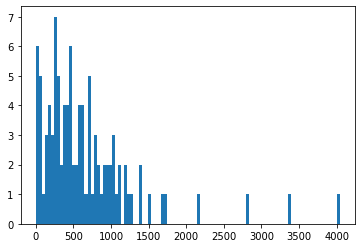

In [14]:
plt.hist(len_chars[-100:], 100);

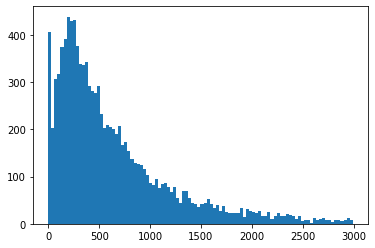

In [15]:
plt.hist(len_chars[len_chars < 3000], 100);

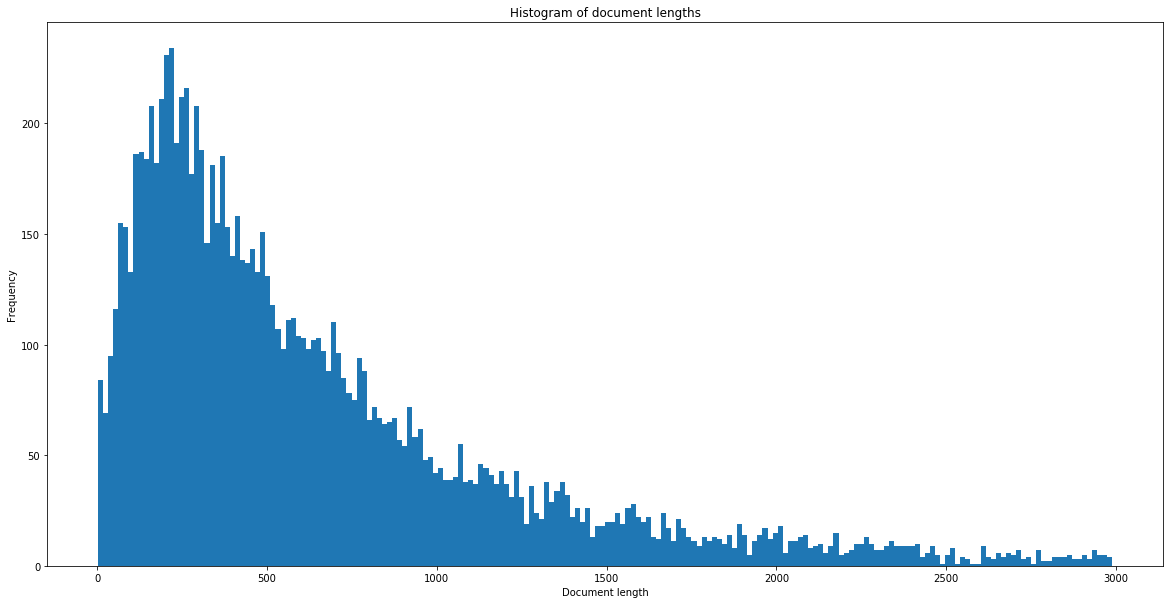

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(len_chars[np.logical_and(len_chars > 1, len_chars < 3000)], 200)
ax.set_title('Histogram of document lengths')
ax.set_xlabel('Document length')
ax.set_ylabel('Frequency');

## Lengths in words

#### Tokenize documents

In [17]:
dataset.data[100]

'\nI\'ve been a very intent NREN spectator of the NREN for years.  As a \ncommercial IP software vendor, it really is my professional opinion that the \nNREN, at this point, is irrelevant to private sector networking.  If it had \nbeen deployed five years ago, it would have been a major development.  Now,\nhowever, it\'s just an upgrade to the NSFnet, and an attempt to revive the \nlagging use of the national supercomputer centers.  You could cut out the \nNSFnet completely, and the Internet would continue chugging along without a \nhiccup (aside from a few universities).\n\nLong-haul networking and Internet connectivity have long since ceased to be \nunder federal sponsorship or regulation, at least in the USA.  The success of \nthe CIX (Commercial Internet Exchange) is a prime example of this.  While our \ndear VP has been promoting his "data superhighway," the private sector has \nbeen building it, without the NSFnet\'s restrictions.\n\nTo illustrate, a connection from the machine o

In [18]:
nltk.word_tokenize(dataset.data[100])

['I',
 "'ve",
 'been',
 'a',
 'very',
 'intent',
 'NREN',
 'spectator',
 'of',
 'the',
 'NREN',
 'for',
 'years',
 '.',
 'As',
 'a',
 'commercial',
 'IP',
 'software',
 'vendor',
 ',',
 'it',
 'really',
 'is',
 'my',
 'professional',
 'opinion',
 'that',
 'the',
 'NREN',
 ',',
 'at',
 'this',
 'point',
 ',',
 'is',
 'irrelevant',
 'to',
 'private',
 'sector',
 'networking',
 '.',
 'If',
 'it',
 'had',
 'been',
 'deployed',
 'five',
 'years',
 'ago',
 ',',
 'it',
 'would',
 'have',
 'been',
 'a',
 'major',
 'development',
 '.',
 'Now',
 ',',
 'however',
 ',',
 'it',
 "'s",
 'just',
 'an',
 'upgrade',
 'to',
 'the',
 'NSFnet',
 ',',
 'and',
 'an',
 'attempt',
 'to',
 'revive',
 'the',
 'lagging',
 'use',
 'of',
 'the',
 'national',
 'supercomputer',
 'centers',
 '.',
 'You',
 'could',
 'cut',
 'out',
 'the',
 'NSFnet',
 'completely',
 ',',
 'and',
 'the',
 'Internet',
 'would',
 'continue',
 'chugging',
 'along',
 'without',
 'a',
 'hiccup',
 '(',
 'aside',
 'from',
 'a',
 'few',
 'unive

In [19]:
tokenized_docs = [nltk.word_tokenize(doc) for doc in dataset.data]
tokenized_docs[0]

['Well',
 'i',
 "'m",
 'not',
 'sure',
 'about',
 'the',
 'story',
 'nad',
 'it',
 'did',
 'seem',
 'biased',
 '.',
 'What',
 'I',
 'disagree',
 'with',
 'is',
 'your',
 'statement',
 'that',
 'the',
 'U.S.',
 'Media',
 'is',
 'out',
 'to',
 'ruin',
 'Israels',
 'reputation',
 '.',
 'That',
 'is',
 'rediculous',
 '.',
 'The',
 'U.S.',
 'media',
 'is',
 'the',
 'most',
 'pro-israeli',
 'media',
 'in',
 'the',
 'world',
 '.',
 'Having',
 'lived',
 'in',
 'Europe',
 'I',
 'realize',
 'that',
 'incidences',
 'such',
 'as',
 'the',
 'one',
 'described',
 'in',
 'the',
 'letter',
 'have',
 'occured',
 '.',
 'The',
 'U.S.',
 'media',
 'as',
 'a',
 'whole',
 'seem',
 'to',
 'try',
 'to',
 'ignore',
 'them',
 '.',
 'The',
 'U.S.',
 'is',
 'subsidizing',
 'Israels',
 'existance',
 'and',
 'the',
 'Europeans',
 'are',
 'not',
 '(',
 'at',
 'least',
 'not',
 'to',
 'the',
 'same',
 'degree',
 ')',
 '.',
 'So',
 'I',
 'think',
 'that',
 'might',
 'be',
 'a',
 'reason',
 'they',
 'report',
 'more',


In [20]:
tokenized_docs = [[word.lower() for word in doc] for doc in tokenized_docs]

In [21]:
len_words = np.array([len(tokenized_doc) for tokenized_doc in tokenized_docs])

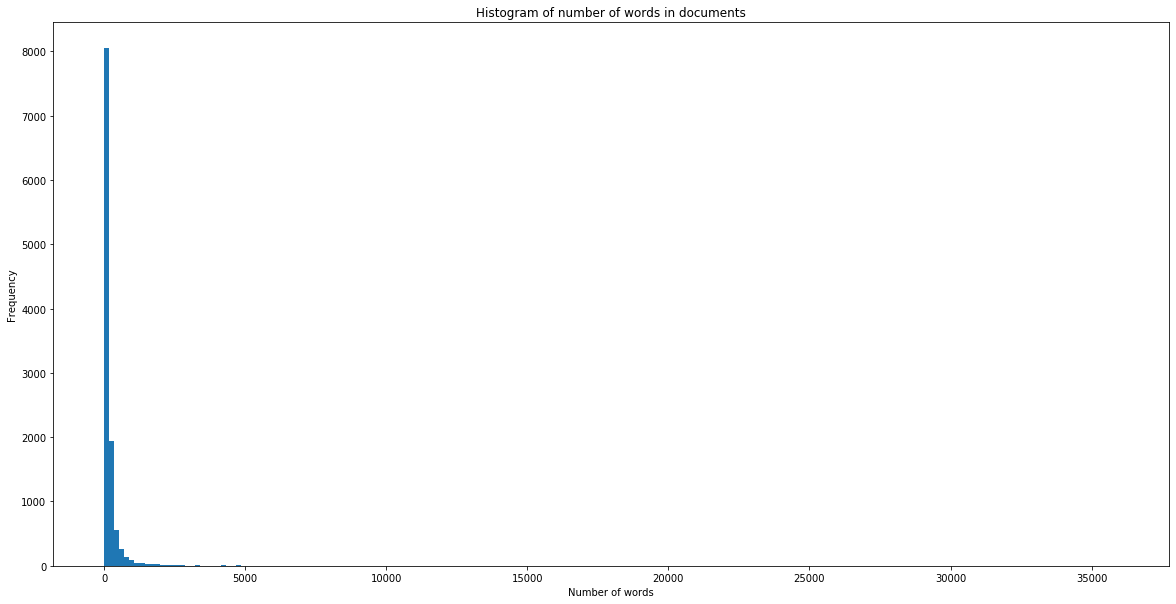

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(len_words, 200)
ax.set_title('Histogram of number of words in documents')
ax.set_xlabel('Number of words')
ax.set_ylabel('Frequency');

In [23]:
np.sort(len_words)[-10:]

array([29487, 29502, 29821, 29871, 29969, 30161, 30385, 30621, 34270,
       35955])

In [24]:
np.argsort(len_words)[-10:]

array([ 5416, 10738,  1867,  5390,  5146,  9060, 10334,  8607,  3700,
        4919])

In [25]:
tokenized_docs[4919]

['--',
 '--',
 '--',
 '--',
 '--',
 '--',
 'part',
 '4',
 'of',
 '14',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 'm',
 ')',
 'g',
 '(',
 'f',
 '&',
 'g',
 '*',
 'z',
 '<',
 'g',
 '*',
 'r',
 ')',
 'g',
 '(',
 ':',
 'nb8',
 ':',
 'nahfnajz',
 '<',
 'ahf',
 '<',
 'ajz',
 ')',
 'ah',
 ':',
 '&',
 'k',
 '*',
 'r',
 '&',
 'b9r',
 ')',
 'g',
 '(',
 'f',
 '&',
 'khf',
 '&',
 'ajz',
 'm',
 '<',
 'ajr',
 '&',
 'b9r',
 ')',
 'ahf',
 '<',
 'g',
 ')',
 'r',
 '&',
 'ajr',
 '&',
 'ajrnk',
 ')',
 'r',
 '&',
 'air',
 '&',
 'kirng',
 '(',
 ':',
 'nb',
 ':',
 'z',
 '&',
 'g',
 '(',
 'fnajz',
 ')',
 'kjz',
 '<',
 'khf',
 'mnb',
 ';',
 "''",
 'nahfleu=771t772z772r',
 ')',
 'l',
 ')',
 ']',
 'ngt',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 'm',
 "''",
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',
 '``',
 '`',
 '@',
 '(',


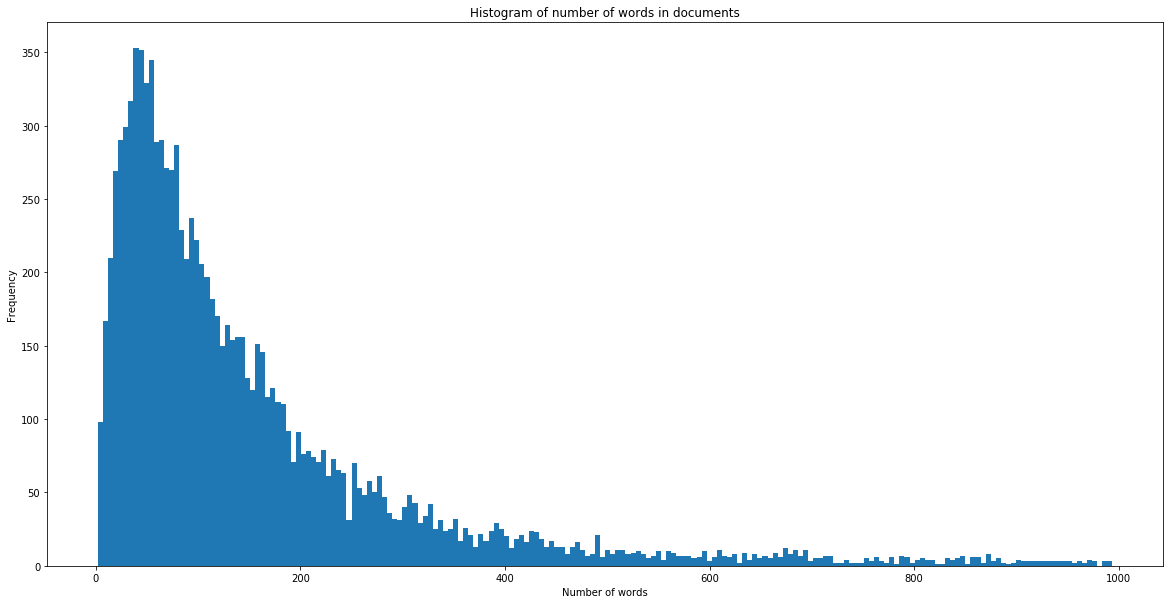

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(len_words[np.logical_and(len_words > 1, len_words < 1000)], 200)
ax.set_title('Histogram of number of words in documents')
ax.set_xlabel('Number of words')
ax.set_ylabel('Frequency');

# Common words

In [27]:
all_words = [word for doc in tokenized_docs for word in doc]

In [28]:
all_words_counter = Counter(all_words)

In [29]:
all_words_counter.most_common(50)

[(',', 110587),
 ('the', 106205),
 ('.', 102430),
 ('>', 83268),
 ("'ax", 61725),
 ('--', 61024),
 ('to', 52838),
 ('of', 46847),
 ('a', 44122),
 ('and', 42444),
 ('(', 40646),
 (')', 39894),
 ('i', 34424),
 ('*', 31017),
 ('is', 30963),
 ('in', 30836),
 (':', 28417),
 ('that', 27942),
 ('it', 23484),
 ('?', 22924),
 ("''", 22730),
 ('for', 19931),
 ('@', 18974),
 ('``', 18401),
 ('you', 18267),
 ('$', 16300),
 (';', 15818),
 ('!', 15652),
 ('<', 15425),
 ('%', 15055),
 ('this', 14481),
 ('on', 14254),
 ('be', 13764),
 ('#', 13473),
 ('are', 13311),
 ('have', 13134),
 ('not', 13086),
 (']', 12906),
 ('with', 12650),
 ("'", 12539),
 ('`', 12195),
 ('&', 11703),
 ('[', 11632),
 ('as', 11348),
 ("'s", 11039),
 ('or', 10414),
 ('-', 10037),
 ("n't", 9872),
 ('was', 9845),
 ('but', 9577)]

Text(0.5, 1.0, 'The 40 most common words')

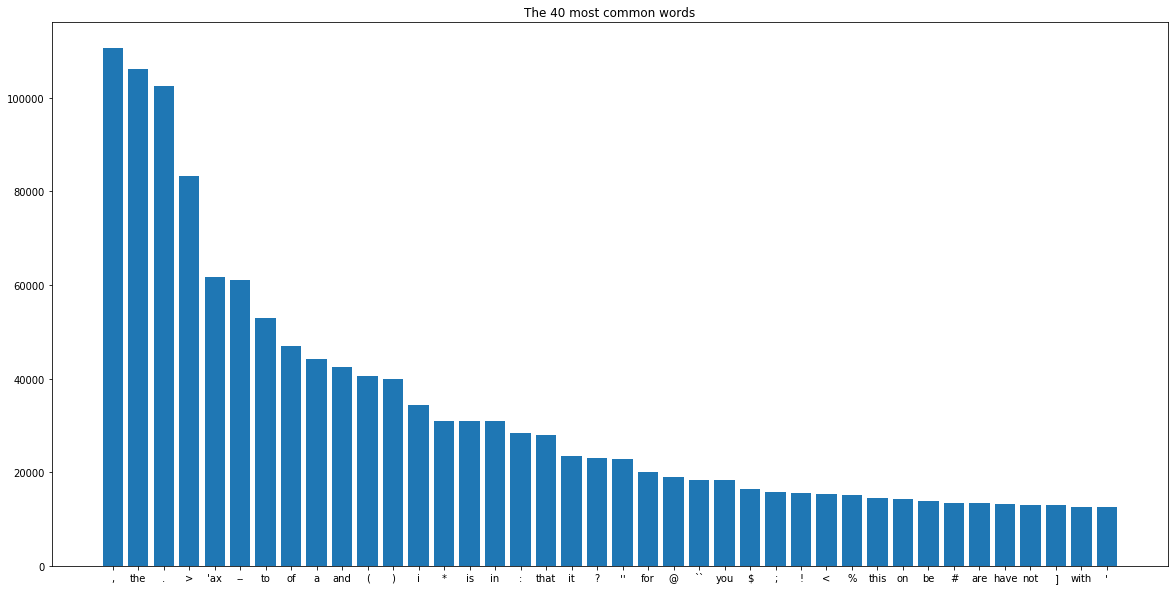

In [30]:
x, y = zip(*all_words_counter.most_common(40))
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x, y)
ax.set_title('The 40 most common words')

## Filtering words

### Keeping alphabetic words

In [31]:
filtered_words = [word for word in all_words if word.isalpha()]
filtered_words_counter = Counter(filtered_words)

Text(0.5, 1.0, 'The 40 most common words')

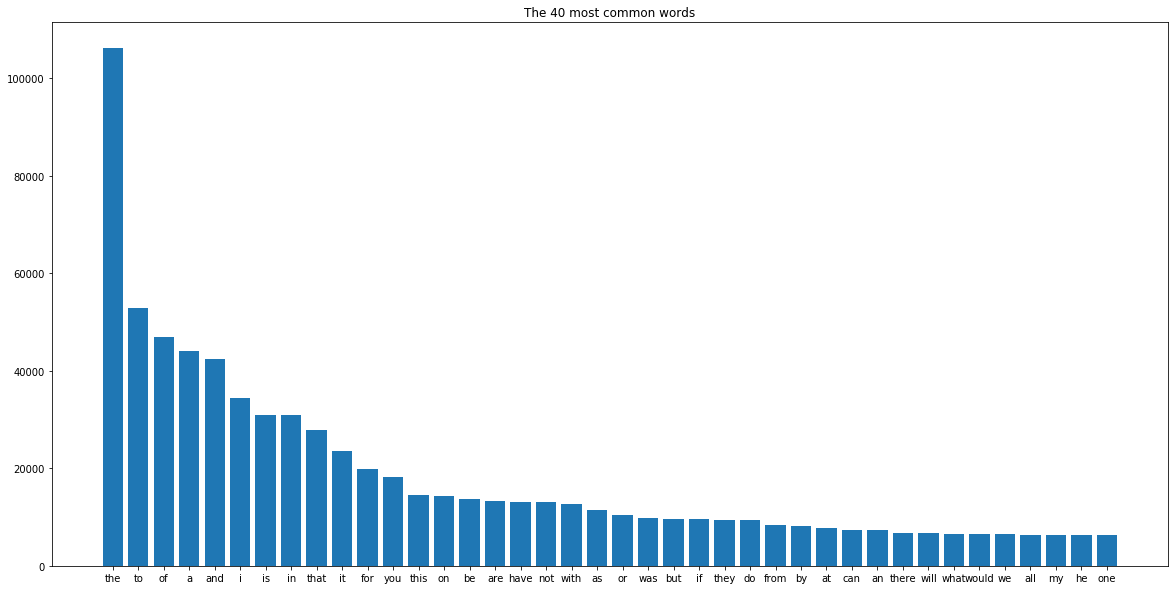

In [32]:
x, y = zip(*filtered_words_counter.most_common(40))
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x, y)
ax.set_title('The 40 most common words')

### Discarding stopwords

In [33]:
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [34]:
filtered_words_stop = [word for word in filtered_words if word not in stopwords]
filtered_words_stop_counter = Counter(filtered_words_stop)

Text(0.5, 1.0, 'The 40 most common words')

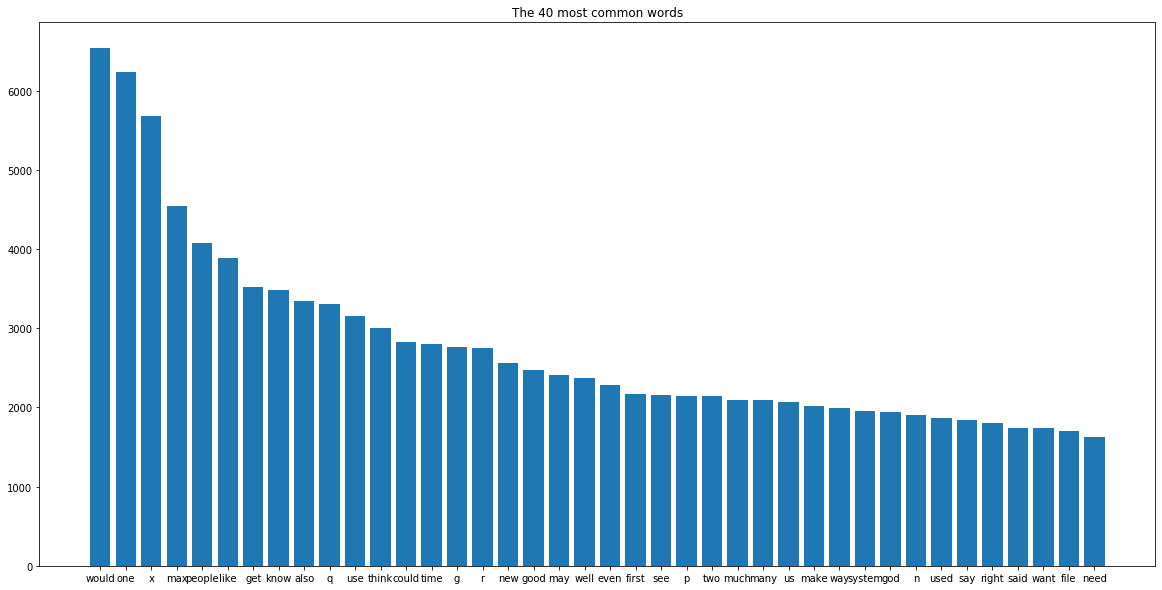

In [35]:
x, y = zip(*filtered_words_stop_counter.most_common(40))
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x, y)
ax.set_title('The 40 most common words')

### Concordance - Why is x so frequent?

In [36]:
context_width = 3
context_num = 20
target_word = 'x'
[all_words[i-context_width:i+context_width] for i, word in enumerate(all_words) if word == target_word][:context_num]

[['more', '.', 'uses', 'x', 'windows', '.'],
 ['net', '.', 'francisco', 'x', 'dejesus', '<'],
 ['pub/sass', '-', '*', 'x', 'window', 'fonts'],
 ['reaction-diffusion', 'textures', ',', 'x', 'windows', 'code'],
 ['movie', 'on', 'an', 'x', 'display', '('],
 ['(', 'fax', ':', 'x', '5893', ')'],
 ['the', 'effort', 'on', 'x', 'toolkits', 'has'],
 ['on', 'top', 'of', 'x', '.', 'papers'],
 ['if', 'you', 'employ', 'x', 'degree', 'of'],
 ['if', 'you', 'employ', 'x', 'degree', 'of'],
 ['r5', 'before', 'any', 'x', 'clients', 'will'],
 ['whom', 'survived', '.', 'x', 'window', 'installation'],
 ['this', 'to', 'the', 'x', 'server', 'and'],
 ['sunos', 'driver', '/', 'x', 'to', 'be'],
 ['implemented', ':', 'under', 'x', '.', 'both'],
 ['rounding', '.', "''", 'x', 'allows', 'the'],
 ['detections', '1', '1', 'x', '2', 'x'],
 ['1', 'x', '2', 'x', '2', 'x'],
 ['2', 'x', '2', 'x', '3', 'x'],
 ['2', 'x', '3', 'x', '3', 'autodetect']]

In [37]:
def concordance(words, target_word, context_width=3, context_num=20):
    concordance_gen = (filtered_words[i-context_width:i+context_width] for i, word in enumerate(filtered_words) if word == target_word)
    return list(islice(concordance_gen, context_num))

In [38]:
concordance(all_words, 'q')

[['khgzc', 'pj', 'ei', 'q', 'cxhkel', 'd'],
 ['cxhkel', 'd', 'pyyy', 'q', 'yr', 'b'],
 ['s', 'ej', 'gs', 'q', 'qqd', 'vi'],
 ['hn', 'b', 's', 'q', 'plk', 'q'],
 ['s', 'q', 'plk', 'q', 'l', 'vbkj'],
 ['mp', 'b', 'ppvjicfmrrekxddi', 'q', 't', 'fhnfmq'],
 ['jqed', 'pi', 'pq', 'q', 'aacvkc', 'f'],
 ['need', 'a', 'point', 'q', 'on', 'the'],
 ['n', 'and', 'l', 'q', 'q', 'is'],
 ['and', 'l', 'q', 'q', 'is', 'the'],
 ['ed', 'ep', 'then', 'q', 'will', 'be'],
 ['camden', 'yards', 'edt', 'q', 'president', 'what'],
 ['think', 'it', 'good', 'q', 'do', 'you'],
 ['think', 'it', 'fine', 'q', 'president', 'how'],
 ['audience', 'f', 'a', 'q', 'reference', 'newsgroups'],
 ['book', 'lost', 'gospel', 'q', 'and', 'christian'],
 ['fabrique', 'nationale', 'and', 'q', 'famas', 'mas'],
 ['go', 'ahead', 'sarah', 'q', 'there', 'are'],
 ['number', 'of', 'them', 'q', 'what', 'federal'],
 ['myers', 'last', 'question', 'q', 'president', 'why']]

# Language models
https://en.wikipedia.org/wiki/Language_model

Sentence: $w_1, w_2, w_3, ...$

$P(w_1, w_2, w_3) = P(w_1) * P(w_2|w_1) * P(w_3|w_1, w_2)$ (chain rule: https://en.wikipedia.org/wiki/Chain_rule_%28probability%29)

Bigram model: we only compute $P(w_2|w_1)$, $P(w_3|w_2)$, ...

$P(w_1, w_2, w_3) \approx P(w_1) * P(w_2|w_1) * P(w_3|w_2)$

## Looking at x

In [39]:
bigrams = nltk.bigrams(all_words)
bigrams

<generator object bigrams at 0x7fd631483cf0>

In [40]:
all_words[:10]

['well', 'i', "'m", 'not', 'sure', 'about', 'the', 'story', 'nad', 'it']

In [41]:
list(islice(bigrams, 20))

[('well', 'i'),
 ('i', "'m"),
 ("'m", 'not'),
 ('not', 'sure'),
 ('sure', 'about'),
 ('about', 'the'),
 ('the', 'story'),
 ('story', 'nad'),
 ('nad', 'it'),
 ('it', 'did'),
 ('did', 'seem'),
 ('seem', 'biased'),
 ('biased', '.'),
 ('.', 'what'),
 ('what', 'i'),
 ('i', 'disagree'),
 ('disagree', 'with'),
 ('with', 'is'),
 ('is', 'your'),
 ('your', 'statement')]

In [42]:
bigrams = nltk.bigrams(all_words)
cond_freqs = nltk.ConditionalFreqDist(bigrams)

In [43]:
cond_freqs['ran']

FreqDist({'into': 17, 'the': 12, 'out': 11, 'to': 8, 'a': 7, 'away': 6, 'across': 4, 'on': 3, 'over': 3, 'about': 3, ...})

In [44]:
cond_freqs['x']

FreqDist({'*': 681, 'x': 592, '/': 228, '}': 188, 'printf': 128, 'if': 115, 'char': 98, ',': 97, 'fprintf': 96, '#': 93, ...})

In [45]:
cond_freqs['q']

FreqDist({'<': 831, ',': 366, '&': 277, ':': 168, '#': 155, '%': 153, '[': 147, ']': 75, 'm': 57, '$': 48, ...})

## Generating text

### Bigrams

In [57]:
len(filtered_words)

1982349

In [46]:
bigrams = nltk.bigrams(filtered_words)
freq_pd = nltk.FreqDist(filtered_words)
cond_pd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(bigrams), nltk.MLEProbDist)

In [47]:
freq_pd.freq('the')

0.05357532906667797

In [48]:
cond_pd['the']

<MLEProbDist based on 106205 samples>

In [49]:
cond_pd['the'].freqdist()

FreqDist({'same': 1547, 'first': 1015, 'other': 862, 'only': 645, 'following': 625, 'way': 531, 'most': 526, 'new': 526, 'time': 489, 'problem': 485, ...})

$w_1$ is given. Generating from $P(w_2|w_1), P(w_3|w_2), ...$

In [50]:
def generate_text(cond_pd, start, length):
    text = []
    word = start
    for i in range(length):
        text.append(word)
        word = cond_pd[word].generate()
    return text

In [51]:
generate_text(cond_pd, 'he', 8)

['he', 'ever', 'bring', 'a', 'lev', 'fit', 'and', 'advances']

### Trigrams

In [52]:
trigrams = nltk.trigrams(filtered_words)
trigrams = (((w1, w2), w3) for w1, w2, w3 in trigrams)
cond_pd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(trigrams), nltk.MLEProbDist)

$w_1, w_2$ given. Generating from $P(w_3|w_1, w_2), P(w_4|w_2, w_3), ...$

In [53]:
def generate_text(cond_pd, start, length):
    word1, word2 = start
    text = [word1]
    for i in range(length):
        text.append(word2)
        try:
            word = cond_pd[(word1, word2)].generate()
        except:
            print('The pair {} is not among the conditions of our trigram model, stopping'.format((word1, word2)))
            break
        word1 = word2
        word2 = word
    return text

In [54]:
cond_pd[('was', 'leads')].freqdist()

FreqDist({'que': 1, 'records': 1})

In [55]:
generate_text(cond_pd, ('he', 'was'), 8)

['he', 'was', 'a', 'major', 'career', 'limiting', 'move', 'in', 'rooms']